<a href="https://colab.research.google.com/github/DanielP0111/REU-Code/blob/main/simpleclassmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

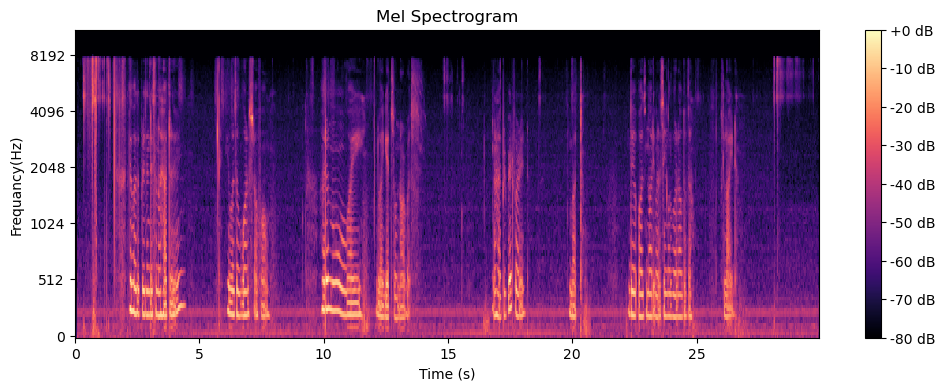

In [ ]:
# building model and working with spectrograms

# 001 depressed


import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import requests
import tempfile

# github
url = 'https://raw.githubusercontent.com/FIU-MOSAIC/REU_sample/3f20bb65c4ce4cc4144491d0658337f1fc7f0000/speech_depression/depressed/MERSA_161_01_001.wav'

# read file
with tempfile.NamedTemporaryFile(suffix='.wav') as temp_audio:
    r = requests.get(url)

    # check
    if r.status_code == 200:
        temp_audio.write(r.content)
        temp_audio.flush()

        # librosa
        y, sr = librosa.load(temp_audio.name)

        # mel spectogram
        S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
        S_dB = librosa.power_to_db(S, ref=np.max)

        # graph
        plt.figure(figsize=(12, 4))
        librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.title('Mel Spectrogram')
        plt.xlabel('Time (s)')
        plt.ylabel('Frequancy(Hz)')
        plt.show()
    else:
        print("Audio failed to be read")


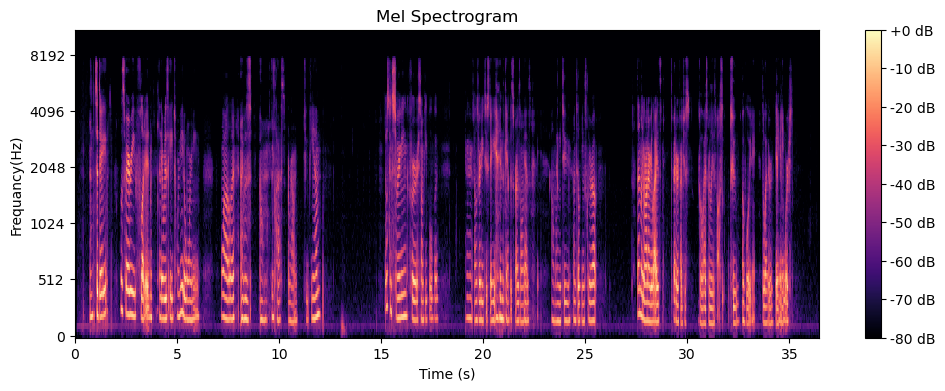

In [ ]:
# 001 healthy

import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import requests
import tempfile

# github
url = 'https://raw.githubusercontent.com/FIU-MOSAIC/REU_sample/3f20bb65c4ce4cc4144491d0658337f1fc7f0000/speech_depression/healthy/MERSA_144_01_001.wav'

# read file
with tempfile.NamedTemporaryFile(suffix='.wav') as temp_audio:
    r = requests.get(url)

    # check
    if r.status_code == 200:
        temp_audio.write(r.content)
        temp_audio.flush()

        # librosa
        y, sr = librosa.load(temp_audio.name)

        # mel spectogram
        S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
        S_dB = librosa.power_to_db(S, ref=np.max)

        # graph
        plt.figure(figsize=(12, 4))
        librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.title('Mel Spectrogram')
        plt.xlabel('Time (s)')
        plt.ylabel('Frequancy(Hz)')
        plt.show()
    else:
        print("Audio failed to be read")


In [ ]:
# folder saves depressed


import requests
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import tempfile

# API URL
api_url = 'https://api.github.com/repos/FIU-MOSAIC/REU_sample/contents/speech_depression/depressed'

# folder for the outputs
output_dir = 'mel_spectrograms_depressed'
os.makedirs(output_dir, exist_ok=True)

# gets the file list from GitHub API
response = requests.get(api_url)
if response.status_code == 200:
    files = response.json()
    wav_files = [f['name'] for f in files if f['name'].endswith('.wav')]

    for filename in wav_files:
        file_url = f"https://raw.githubusercontent.com/FIU-MOSAIC/REU_sample/main/speech_depression/depressed/{filename}"
        print(f"Processing: {filename}")

        with tempfile.NamedTemporaryFile(suffix='.wav') as temp_audio:
            r = requests.get(file_url)
            if r.status_code == 200:
                temp_audio.write(r.content)
                temp_audio.flush()

                # loads audio
                y, sr = librosa.load(temp_audio.name)

                # generates mel spectrogram
                S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
                S_dB = librosa.power_to_db(S, ref=np.max)

                # plots and saves spectrogram
                fig, ax = plt.subplots(figsize=(12, 4))
                img = librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel', ax=ax)
                ax.set_ylabel('Frequancy (Hz)')
                ax.set_xlabel('Time (s)')
                ax.set_title(f'Mel Spectrogram: {filename}')
                fig.colorbar(img, ax=ax, format='%+2.0f dB', label='Decibels')

                # Add right y-axis label
                ax2 = ax.twinx()
                ax2.set_ylabel('Intensity (dB)')
                ax2.set_yticks([])

                out_path = os.path.join(output_dir, filename.replace('.wav', '.png'))
                plt.savefig(out_path)
                plt.close()
                print(f"Saved to: {out_path}")
            else:
                print(f"Failed to download")
else:
    print(f"Failed to access GitHub API")


Processing: MERSA_161_01_001.wav
Saved to: mel_spectrograms_depressed/MERSA_161_01_001.png
Processing: MERSA_177_01_001.wav
Saved to: mel_spectrograms_depressed/MERSA_177_01_001.png
Processing: MERSA_194_01_001.wav
Saved to: mel_spectrograms_depressed/MERSA_194_01_001.png
Processing: MERSA_199_01_001.wav
Saved to: mel_spectrograms_depressed/MERSA_199_01_001.png
Processing: MERSA_202_01_001.wav
Saved to: mel_spectrograms_depressed/MERSA_202_01_001.png
Processing: MERSA_206_01_001.wav
Saved to: mel_spectrograms_depressed/MERSA_206_01_001.png
Processing: MERSA_213_01_001.wav
Saved to: mel_spectrograms_depressed/MERSA_213_01_001.png
Processing: MERSA_221_01_001.wav
Saved to: mel_spectrograms_depressed/MERSA_221_01_001.png
Processing: MERSA_223_01_001.wav
Saved to: mel_spectrograms_depressed/MERSA_223_01_001.png
Processing: MERSA_224_01_001.wav
Saved to: mel_spectrograms_depressed/MERSA_224_01_001.png
Processing: MERSA_227_01_001.wav
Saved to: mel_spectrograms_depressed/MERSA_227_01_001.png

In [ ]:
# folder saves healthy

import requests
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import tempfile

# API URL
api_url = 'https://api.github.com/repos/FIU-MOSAIC/REU_sample/contents/speech_depression/healthy'

# folder for the outputs
output_dir = 'mel_spectrograms_healthy'
os.makedirs(output_dir, exist_ok=True)

# gets the file list from GitHub API
response = requests.get(api_url)
if response.status_code == 200:
    files = response.json()
    wav_files = [f['name'] for f in files if f['name'].endswith('.wav')]

    for filename in wav_files:
        file_url = f"https://raw.githubusercontent.com/FIU-MOSAIC/REU_sample/main/speech_depression/healthy/{filename}"
        print(f"Processing: {filename}")

        with tempfile.NamedTemporaryFile(suffix='.wav') as temp_audio:
            r = requests.get(file_url)
            if r.status_code == 200:
                temp_audio.write(r.content)
                temp_audio.flush()

                # loads audio
                y, sr = librosa.load(temp_audio.name)

                # generates mel spectrogram
                S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
                S_dB = librosa.power_to_db(S, ref=np.max)

                # plots and saves spectrogram
                fig, ax = plt.subplots(figsize=(12, 4))
                img = librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel', ax=ax)
                ax.set_ylabel('Frequancy (Hz)')
                ax.set_xlabel('Time (s)')
                ax.set_title(f'Mel Spectrogram: {filename}')
                fig.colorbar(img, ax=ax, format='%+2.0f dB', label='Decibels')

                ax2 = ax.twinx()
                ax2.set_ylabel('Intensity (dB)')
                ax2.set_yticks([])

                out_path = os.path.join(output_dir, filename.replace('.wav', '.png'))
                plt.savefig(out_path)
                plt.close()
                print(f"Saved to: {out_path}")
            else:
                print(f"Failed to download")
else:
    print(f"Failed to access GitHub API")


Processing: MERSA_144_01_001.wav
Saved to: mel_spectrograms_healthy/MERSA_144_01_001.png
Processing: MERSA_174_01_001.wav
Saved to: mel_spectrograms_healthy/MERSA_174_01_001.png
Processing: MERSA_196_01_001.wav
Saved to: mel_spectrograms_healthy/MERSA_196_01_001.png
Processing: MERSA_201_01_001.wav
Saved to: mel_spectrograms_healthy/MERSA_201_01_001.png
Processing: MERSA_203_01_001.wav
Saved to: mel_spectrograms_healthy/MERSA_203_01_001.png
Processing: MERSA_205_01_001.wav
Saved to: mel_spectrograms_healthy/MERSA_205_01_001.png
Processing: MERSA_208_01_001.wav
Saved to: mel_spectrograms_healthy/MERSA_208_01_001.png
Processing: MERSA_209_01_001.wav
Saved to: mel_spectrograms_healthy/MERSA_209_01_001.png
Processing: MERSA_214_01_001.wav
Saved to: mel_spectrograms_healthy/MERSA_214_01_001.png
Processing: MERSA_216_01_001.wav
Saved to: mel_spectrograms_healthy/MERSA_216_01_001.png
Processing: MERSA_222_01_001.wav
Saved to: mel_spectrograms_healthy/MERSA_222_01_001.png
Processing: MERSA_225

In [ ]:
# split the data into training and testing sets

import os
import librosa
import numpy as np
import requests
import tempfile

# GitHub API URLs
folders = {
    'depressed': 'https://api.github.com/repos/FIU-MOSAIC/REU_sample/contents/speech_depression/depressed',
    'healthy': 'https://api.github.com/repos/FIU-MOSAIC/REU_sample/contents/speech_depression/healthy'
}

X = []
y = []

for label, api_url in folders.items():
    response = requests.get(api_url)
    if response.status_code == 200:
        files = response.json()
        wav_files = [f for f in files if f['name'].endswith('.wav')]

        for f in wav_files:
            file_url = f"https://raw.githubusercontent.com/FIU-MOSAIC/REU_sample/main/speech_depression/{label}/{f['name']}"
            print(f"Processing {file_url}")

            with tempfile.NamedTemporaryFile(suffix='.wav') as temp_audio:
                r = requests.get(file_url)
                if r.status_code == 200:
                    temp_audio.write(r.content)
                    temp_audio.flush()

                    try:
                        y_audio, sr = librosa.load(temp_audio.name)
                        mfcc = librosa.feature.mfcc(y=y_audio, sr=sr, n_mfcc=13)
                        mfcc_mean = np.mean(mfcc, axis=1)
                        X.append(mfcc_mean)
                        y.append(1 if label == 'depressed' else 0)
                    except Exception as e:
                        print(f"Skipping {f['name']}: {e}")


Processing https://raw.githubusercontent.com/FIU-MOSAIC/REU_sample/main/speech_depression/depressed/MERSA_161_01_001.wav
Processing https://raw.githubusercontent.com/FIU-MOSAIC/REU_sample/main/speech_depression/depressed/MERSA_177_01_001.wav
Processing https://raw.githubusercontent.com/FIU-MOSAIC/REU_sample/main/speech_depression/depressed/MERSA_194_01_001.wav
Processing https://raw.githubusercontent.com/FIU-MOSAIC/REU_sample/main/speech_depression/depressed/MERSA_199_01_001.wav
Processing https://raw.githubusercontent.com/FIU-MOSAIC/REU_sample/main/speech_depression/depressed/MERSA_202_01_001.wav
Processing https://raw.githubusercontent.com/FIU-MOSAIC/REU_sample/main/speech_depression/depressed/MERSA_206_01_001.wav
Processing https://raw.githubusercontent.com/FIU-MOSAIC/REU_sample/main/speech_depression/depressed/MERSA_213_01_001.wav
Processing https://raw.githubusercontent.com/FIU-MOSAIC/REU_sample/main/speech_depression/depressed/MERSA_221_01_001.wav
Processing https://raw.githubuse

In [ ]:
# logistic regression
# split the data into training and testing sets
# one-hot encoded
# 1 = depressed
# 0 = healthy

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report

# 1 = depressed, 0 = healthy
X = np.array(X)
y = np.array(y)

X_flat = X.reshape(X.shape[0], -1)

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.2, random_state=42)

# train
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("\nClassification Report:\n", report)


Accuracy: 0.6666666666666666
F1 Score: 0.6666666666666666

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.50      1.00      0.67         3

    accuracy                           0.67         9
   macro avg       0.75      0.75      0.67         9
weighted avg       0.83      0.67      0.67         9



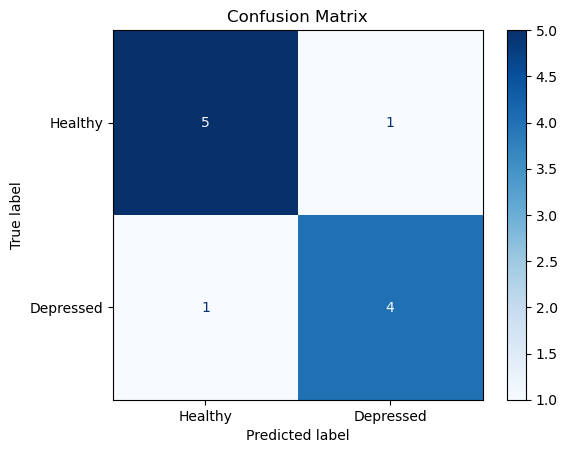

In [ ]:
# confusion matrix for logisitc regression

from sklearn.metrics import roc_curve, auc

y_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

#roc curve
# plt.figure()
# plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC)')
# plt.legend()
# plt.grid(True)
# plt.show()

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Healthy', 'Depressed'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# cnn model
# split the data into training and testing sets
# one-hot encoded
# 1 = depressed
# 0 = healthy

from tensorflow.keras import Input

# CNN
X = np.array(X)
y = np.array(y)

# reshape for the cnn
X_cnn = X[..., np.newaxis]  # shape becomes (num_samples, 13, 1)
y_cat = to_categorical(y, num_classes=2)

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_cnn, y_cat, test_size=0.2, random_state=42)

# CNN model
model = Sequential([
    Input(shape=(13, 1)),
    Conv1D(32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(2, activation='softmax')
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# train model
model.fit(X_train, y_train, epochs=20, batch_size=8, validation_split=0.1, verbose=1)

# accuracy, f1, recall precision
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
report = classification_report(y_true, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("\nClassification Report:\n", report)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.5900 - loss: 13.0817 - val_accuracy: 0.2500 - val_loss: 2.3843
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5658 - loss: 14.3684 - val_accuracy: 0.5000 - val_loss: 3.3499
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6492 - loss: 9.9063 - val_accuracy: 0.5000 - val_loss: 4.2349
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4092 - loss: 20.3666 - val_accuracy: 0.2500 - val_loss: 1.4060
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5942 - loss: 15.4167 - val_accuracy: 0.5000 - val_loss: 4.8608
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3583 - loss: 14.2114 - val_accuracy: 0.5000 - val_loss: 7.5128
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5900 - loss: 9.6514 - val_accuracy: 0.5000 - val_loss: 6.6776
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3892 - loss: 13.6801 - val_accuracy: 0.5000 - val_loss: 5

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5750 - loss: 4.9272 - val_accuracy: 0.5000 - val_loss: 3.2550
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5092 - loss: 5.5964 - val_accuracy: 0.5000 - val_loss: 4.6837
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4225 - loss: 5.3415 - val_accuracy: 0.5000 - val_loss: 6.3671
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7225 - loss: 2.4020 - val_accuracy: 0.5000 - val_loss: 6.7044
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6375 - loss: 2.7360 - val_accuracy: 0.5000 - val_loss: 6.7370
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4367 - loss: 4.0340 - val_accuracy: 0.5000 - val_loss: 6.5302
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6700 - loss: 1.8212 - val_accuracy: 0.5000 - val_loss: 6.0405
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6483 - loss: 3.2164 - val_accuracy: 0.5000 - val_loss: 4.7820


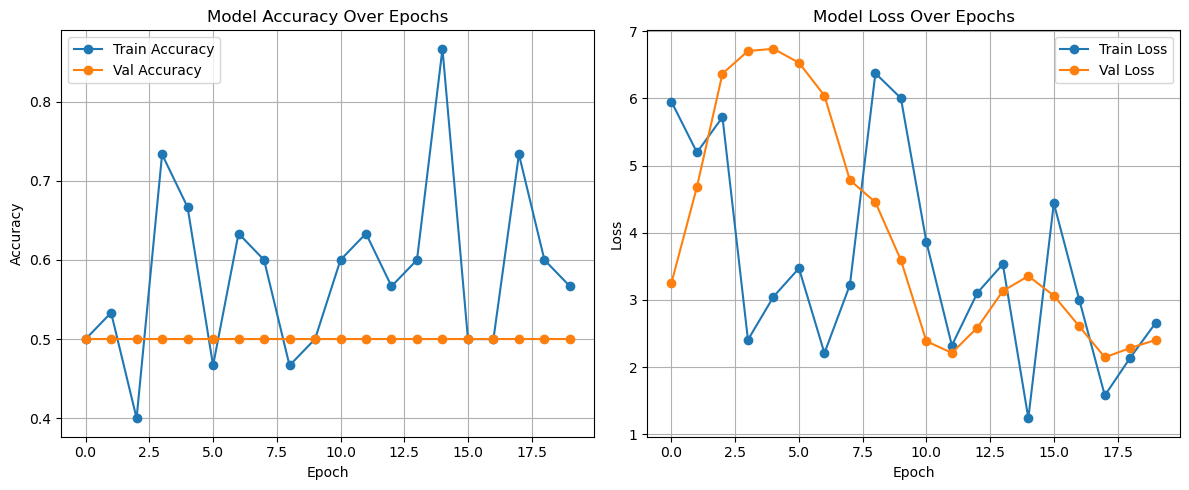

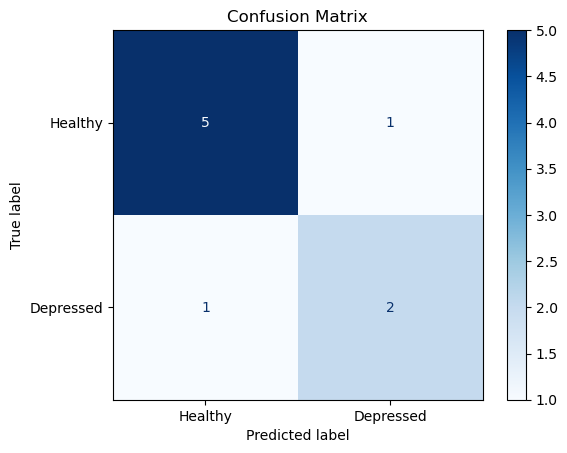

In [ ]:
# cnn model
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot training history
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=8,
    validation_split=0.1,
    verbose=1
)

# Accuracy plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Healthy', 'Depressed'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [ ]:

# Initially, I am able to identify that in comparison between the Logistic Regression and CNN model, the CNN model seems to be more accurate
# at times. This is most likely happening because CNNs are capable of capturing complex, hierarchical patterns in data, especially when
# dealing with features that have spatial/sequential structures. But on the other hand, Logistic Regression is a linear model and works well
# for simple and linear problems and basically lacks the capacity to model non-linear relationships. In contrast, CNNs can extract and learn
# intricate features from the audio inputs, leading to better performance in tasks like depression detection from speech, where patterns are
# often subtle and non-linear.
